### Name: Abu Horaira Hridhon  
### URL: https://www.kaggle.com/datasets/beridzeg45/food-nutritional-facts

# Initializing the notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

# Loading and cleaning the data

In [2]:
df = pd.read_csv('foodstruct_nutritional_facts.csv')

print("Dataset rows and columns:", df.shape)

Dataset rows and columns: (1174, 59)


In [3]:
df.head()

,Food Name,Category Name,Calcium,Calories,Carbs,Cholesterol,Copper,Fats,Fiber,Folate,...,Vitamin D,Vitamin E,Vitamin K,Omega-3 - ALA,Omega-6 - Eicosadienoic acid,Omega-6 - Gamma-linoleic acid,Omega-3 - Eicosatrienoic acid,Omega-6 - Dihomo-gamma-linoleic acid,Omega-6 - Linoleic acid,Omega-6 - Arachidonic acid
0,Acerola,Fruits,0.012,32.0,7.7,0.0,0.00009,0.30,1.1,0.000014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Apple,Fruits,0.006,52.0,14.0,0.0,0.00003,0.17,2.4,0.000003,...,0.0,0.00018,0.000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Apricot,Fruits,0.013,48.0,11.0,0.0,0.00008,0.39,2.0,0.000009,...,0.0,0.00089,0.000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dried fruit,Fruits,0.055,241.0,63.0,0.0,0.00034,0.51,7.3,0.000010,...,0.0,0.00430,0.000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Avocado,Fruits,0.012,160.0,8.5,0.0,0.00019,15.00,6.7,0.000081,...,0.0,0.00210,0.000021,0.11,0.0,0.02,NaN,NaN,NaN,NaN


In [4]:
# Remove all spaces from column names
df.columns = df.columns.str.replace(' ', '')

print("Feature Names:", df.columns)

Feature Names: Index(['FoodName', 'CategoryName', 'Calcium', 'Calories', 'Carbs',
       'Cholesterol', 'Copper', 'Fats', 'Fiber', 'Folate', 'Iron', 'Magnesium',
       'MonounsaturatedFat', 'Netcarbs', 'Omega-3-DHA', 'Omega-3-DPA',
       'Omega-3-EPA', 'Phosphorus', 'Polyunsaturatedfat', 'Potassium',
       'Protein', 'SaturatedFat', 'Selenium', 'Sodium', 'TransFat',
       'VitaminA(IU)', 'VitaminARAE', 'VitaminB1', 'VitaminB12', 'VitaminB2',
       'VitaminB3', 'VitaminB5', 'VitaminB6', 'VitaminC', 'Zinc', 'Choline',
       'Fructose', 'Histidine', 'Isoleucine', 'Leucine', 'Lysine', 'Manganese',
       'Methionine', 'Phenylalanine', 'Starch', 'Sugar', 'Threonine',
       'Tryptophan', 'Valine', 'VitaminD', 'VitaminE', 'VitaminK',
       'Omega-3-ALA', 'Omega-6-Eicosadienoicacid',
       'Omega-6-Gamma-linoleicacid', 'Omega-3-Eicosatrienoicacid',
       'Omega-6-Dihomo-gamma-linoleicacid', 'Omega-6-Linoleicacid',
       'Omega-6-Arachidonicacid'],
      dtype='object')


In [5]:
# Identifying categorical features in the dataset
print("Categorical Features:", df.select_dtypes(include=['category', 'object']).columns)

Categorical Features: Index(['FoodName', 'CategoryName'], dtype='object')


Only 'FoodName', and 'CategoryName' are categorical features. Between these two, 'FoodName' will be dropped, and 'CategoryName' will be made target feature.

In [6]:
# Identifying columns with missing values
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

print(missing_columns.dtype)
print(missing_columns)

int64
Calcium                                25
Cholesterol                            55
Copper                                 80
Fiber                                  98
Folate                                103
Iron                                   21
Magnesium                              61
MonounsaturatedFat                    110
Netcarbs                                1
Omega-3-DHA                           272
Omega-3-DPA                           279
Omega-3-EPA                           271
Phosphorus                             48
Polyunsaturatedfat                    110
Potassium                              45
SaturatedFat                           81
Selenium                              154
Sodium                                 21
TransFat                              540
VitaminA(IU)                           56
VitaminARAE                           118
VitaminB1                              59
VitaminB12                             91
VitaminB2                   

- We can see that all the missing columns are numeric. 

- Here, 'Omega-6-Gamma-linoleicacid', 'Omega-3-Eicosatrienoicacid', 'Omega-6-Dihomo-gamma-linoleicacid ', 'Omega-6-Linoleicacid ', 'Omega-6-Arachidonicacid' have a lot of missing values (more than 1000). Filling the missing values of these features may not help in classification. We can drop these features.

- We will also drop 'FoodName' features. As it will not help in classification.


In [7]:
# Select a subset of columns
df_new1 = df.drop(columns=['FoodName', 'Omega-6-Gamma-linoleicacid', 'Omega-3-Eicosatrienoicacid', 
                          'Omega-6-Dihomo-gamma-linoleicacid', 'Omega-6-Linoleicacid', 
                          'Omega-6-Arachidonicacid'])

In [8]:
print("New dataset rows and columns:", df_new1.shape)

New dataset rows and columns: (1174, 53)


In [9]:
df_new1.head()

,CategoryName,Calcium,Calories,Carbs,Cholesterol,Copper,Fats,Fiber,Folate,Iron,...,Starch,Sugar,Threonine,Tryptophan,Valine,VitaminD,VitaminE,VitaminK,Omega-3-ALA,Omega-6-Eicosadienoicacid
0,Fruits,0.012,32.0,7.7,0.0,0.00009,0.30,1.1,0.000014,0.00020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fruits,0.006,52.0,14.0,0.0,0.00003,0.17,2.4,0.000003,0.00012,...,0.05,10.00,0.00001,0.00000,0.00001,0.0,0.00018,0.000002,NaN,NaN
2,Fruits,0.013,48.0,11.0,0.0,0.00008,0.39,2.0,0.000009,0.00039,...,NaN,9.20,0.00005,0.00002,0.00005,0.0,0.00089,0.000003,NaN,NaN
3,Fruits,0.055,241.0,63.0,0.0,0.00034,0.51,7.3,0.000010,0.00270,...,0.35,53.00,0.00007,0.00002,0.00008,0.0,0.00430,0.000003,NaN,NaN
4,Fruits,0.012,160.0,8.5,0.0,0.00019,15.00,6.7,0.000081,0.00055,...,0.11,0.66,0.00007,0.00003,0.00011,0.0,0.00210,0.000021,0.11,0.0


In [10]:
# Observe the missing values in 'df_new1'
# Identifying columns with missing values
missing_values1 = df_new1.isnull().sum()
missing_columns1 = missing_values1[missing_values1 > 0]

In [11]:
print(missing_columns1.dtype)
print(missing_columns1)

int64
Calcium                       25
Cholesterol                   55
Copper                        80
Fiber                         98
Folate                       103
Iron                          21
Magnesium                     61
MonounsaturatedFat           110
Netcarbs                       1
Omega-3-DHA                  272
Omega-3-DPA                  279
Omega-3-EPA                  271
Phosphorus                    48
Polyunsaturatedfat           110
Potassium                     45
SaturatedFat                  81
Selenium                     154
Sodium                        21
TransFat                     540
VitaminA(IU)                  56
VitaminARAE                  118
VitaminB1                     59
VitaminB12                    91
VitaminB2                     58
VitaminB3                     59
VitaminB5                    199
VitaminB6                     83
VitaminC                      50
Zinc                          66
Choline                      442
Fruc

- Here, we can replace missing values with 'mean' or 'mode' or 'meadian' for the features which have low missing values (e.g., 'Calcium', 'Iron', 'Magnesium', etc.). 

- For features with very high missing values (like 'Omega-3-ALA, 'Omega-6-Eicosadienoicacid'), 
we can replace the missing values with 0.

In [12]:
# Setting a threshold for "high" missing values (e.g., 50% of the total rows are missing)
threshold = 0.5 * len(df_new1)

# Loop through columns and handle missing values based on the threshold
for column, missing_count in missing_values1.items():
    if missing_count > 0:  
        if missing_count < threshold:
            # For columns with low missing values, replace with mean
            df_new1[column] = df_new1[column].fillna(df_new1[column].mean())
        else:
            # For columns with high missing values, replace with 0
            df_new1[column] = df_new1[column].fillna(0)


In [13]:
# Verify all missing values are replaced
print(df_new1.isna().sum())

CategoryName                 0
Calcium                      0
Calories                     0
Carbs                        0
Cholesterol                  0
Copper                       0
Fats                         0
Fiber                        0
Folate                       0
Iron                         0
Magnesium                    0
MonounsaturatedFat           0
Netcarbs                     0
Omega-3-DHA                  0
Omega-3-DPA                  0
Omega-3-EPA                  0
Phosphorus                   0
Polyunsaturatedfat           0
Potassium                    0
Protein                      0
SaturatedFat                 0
Selenium                     0
Sodium                       0
TransFat                     0
VitaminA(IU)                 0
VitaminARAE                  0
VitaminB1                    0
VitaminB12                   0
VitaminB2                    0
VitaminB3                    0
VitaminB5                    0
VitaminB6                    0
VitaminC

In [14]:
# After observing correlation matrix to see which non-target features are strongly correlated
# with each other, 
df_new2 = df_new1.drop(columns=['Netcarbs', 'Valine', 'Leucine', 'Isoleucine',
                              'MonounsaturatedFat', 'VitaminARAE', 'Omega-3-DPA', 'Omega-3-EPA',
                         ])

print("Updated dataset rows and columns:", df_new2.shape)
# print(df_new2.head())

Updated dataset rows and columns: (1174, 45)


In [15]:
# Split the dataset into 70/30 train test split
train = df_new2.sample(frac=0.7, random_state=2) # random_state is used for consistency in results,
test = df_new2.drop(train.index)

# print()
# print("Train set rows and columns:", train.shape)
# print("Test set rows and columns:", test.shape)

# X - non-target features, y - target feature
X_train = train.drop(columns=['CategoryName']) # 'CategoryName' is chosen as target feature
X_test = test.drop(columns=['CategoryName'])

y_train = train['CategoryName']
y_test = test['CategoryName']

print()
print("Train set features:")
print(X_train)
print()
print("Train set target:")
print(y_train)
print()
print("Test set features:")
print(X_test)
print()
print("Test set target:")
print(y_test)
print()


Train set features:
     Calcium  Calories  Carbs  Cholesterol   Copper  Fats      Fiber  \
618    0.043     289.0  56.00        0.073  0.00020  2.10   3.123885   
102    0.105      13.0   2.20        0.000  0.00002  0.20   1.000000   
836    0.004      46.0   0.77        0.000  0.00001  0.00   0.000000   
328    0.087      50.0  11.00        0.000  0.00004  0.21   0.500000   
47     0.020      43.0  11.00        0.000  0.00005  0.26   1.700000   
..       ...       ...    ...          ...      ...   ...        ...   
638    0.138     382.0  77.00        0.007  0.00002  8.10   0.000000   
569    0.177      23.0   2.70        0.000  0.00039  0.64   1.600000   
582    0.117      24.0   3.00        0.000  0.00014  0.56   3.000000   
383    0.024     338.0  76.00        0.000  0.00037  1.60  15.000000   
145    0.030      28.0   6.40        0.000  0.00009  0.10   1.800000   

       Folate     Iron  Magnesium  ...  Phenylalanine  Starch      Sugar  \
618  0.000177  0.00330      0.063  ...

- We will encode the target column 'CategoryName', which consists of string values, several classifiers may not work properly if not encoded.

In [16]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the entire CategoryName column (
label_encoder.fit(df_new2['CategoryName'])

# Transform the CategoryName column in both y_train and y_test
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

category_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

print("Category to encoded value mapping:")
print(category_mapping)
print()

Category to encoded value mapping:
{'Baby Foods': 0, 'Baked Products': 1, 'Beverages': 2, 'Dairy': 3, 'Fast Foods': 4, 'Fruits': 5, 'Grains': 6, 'Greens': 7, 'Meals, Entrees, and Side Dishes': 8, 'Meat': 9, 'Mushrooms': 10, 'Nuts': 11, 'Oils and Sauces': 12, 'Seafood': 13, 'Soups': 14, 'Spices': 15, 'Sweets': 16, 'Vegetables': 17}



# Creating and fitting a pipeline

In [17]:
pipeline = Pipeline(steps=[
    ('scale', MinMaxScaler()),
    ('classify', RandomForestClassifier(class_weight='balanced', random_state=1))
    # class_weight='balanced': Adjust the weights for different classes in imbalanced dataset

])

param_grid = [

    {
        'classify': [LogisticRegression(class_weight='balanced')],         
        'classify__C': [0.1, 1, 10],
        'classify__penalty': ['l1', 'l2'],
        'classify__solver': ['liblinear'],
    },

    {
        'classify': [KNeighborsClassifier()],
        'classify__n_neighbors': [3, 5, 7],
        'classify__weights': ['uniform', 'distance'],
        'classify__algorithm': ['auto', 'ball_tree', 'kd_tree'],
    },

    {
        'classify': [DecisionTreeClassifier(class_weight='balanced')],
        'classify__criterion': ['gini', 'entropy'],
        'classify__max_depth': [None, 10, 20],
    },

    {
        'classify': [GaussianNB()],
    },

    
    {
        'classify': [RandomForestClassifier(class_weight='balanced', random_state=1)],
        'classify__n_estimators': [100, 200, 300, 500],
        'classify__max_depth': [None, 10, 20],
        'classify__min_samples_split': [2, 5, 10],
        'classify__min_samples_leaf': [1, 2, 4],
        'classify__max_features': ['sqrt', 'log2', None],
    },

    {
        'classify': [GradientBoostingClassifier()],
        'classify__n_estimators': [100, 200, 300, 500],
        'classify__learning_rate': [0.01, 0.05, 0.1],
        'classify__max_depth': [3, 5, 7],
    },

    

]

In [18]:
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

- StratifiedKFold helps ensure that cross-validation process contains approximately
the same proportion of each class as the original dataset.

- A regular KFold might end up with some folds that are missing minority classes like 'Mushrooms' and 'Baby Foods'

In [19]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipeline,  
    param_distributions=param_grid,  
    n_iter=50,  
    scoring='f1_weighted',  
    cv=cv_stratified,  
    n_jobs=-1,  
    random_state=42  
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train_encoded)

# Predicting and scoring
print("Best Estimator:", random_search.best_estimator_)
print()
print("Best Score (F1 score weighted) during RandomizedSearch:", random_search.best_score_)
# print("Best Parameters:", random_search.best_params_)

/Users/horaira/Documents/miniconda_install/miniconda3/envs/cs437_ml/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Estimator: Pipeline(steps=[('scale', MinMaxScaler()),
                ('classify',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_split=10, n_estimators=500,
                                        random_state=1))])

Best Score (F1 score weighted) during RandomizedSearch: 0.7764601715523758


- Here, we can see an warning because the least populated class 'Baby Foods' has only 2 members in the training set, so in 5-fold CV, 'Baby Foods' cannot be distributed in each fold.

In [20]:
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

f1_weighted = f1_score(y_test_encoded, y_pred, average='weighted')
print("Weighted F1 Score on test set:", f1_weighted)

Weighted F1 Score on test set: 0.7989795947456614


# Reflection

## 1. Target selection

- I wanted to approach this dataset as a classification problem by classifying category of foods, i.e., 'CategoryName' will be the target feature.

- We have 'Baked Products', 'Meat', 'Sweets', 'Meals, Entrees, and Side Dishes', 'Vegetables', 'Fruits', 'Beverages', 'Seafood', 'Grains', 'Soups', 'Greens', 'Dairy', 'Oils and Sauces', 'Spices', 'Fast Foods', 'Nuts', 'Mushrooms', 'Baby Foods' as food categories.

- These food categories are strongly related with the food nutrients, e.g., 'Meat', 'Seafood' have high amount of protein value in 'Protein' feature. 'Fruits', 'Vegetables', 'Greens' are low in 'Calories', whereas 'Oils and Sauces', 'Nuts' are high in 'Calories'. 'Sweets', 'Beverages' have high 'Sugar', whereas 'Vegetables', 'Spices' have low sugar.


In [21]:
# We can summarize key nutritional features by category
category_summary = df_new2.groupby('CategoryName').mean()

# Display summary statistics for a few key features
category_summary[['Calories', 'Carbs', 'Fats', 'Sugar', 'Protein', 'Fiber']]

,Calories,Carbs,Fats,Sugar,Protein,Fiber
CategoryName,,,,,,
Baby Foods,284.000000,52.666667,4.733333,8.290000,7.400000,3.433333
Baked Products,342.028302,53.169811,11.371132,11.928597,7.524528,3.109040
Beverages,88.595238,8.939167,0.541905,9.486246,0.388810,0.666170
Dairy,261.000000,7.844310,19.287931,6.471326,14.201724,0.098276
Fast Foods,242.111111,23.493333,12.017778,4.954120,10.574444,2.079370
Fruits,80.606742,18.703371,0.973371,12.544560,1.282584,3.745649
Grains,204.735294,30.535294,5.065588,5.229288,10.695000,6.125571
Greens,85.000000,16.576667,1.170000,5.334693,3.736333,3.670647
"Meals, Entrees, and Side Dishes",317.066667,52.446667,9.260333,15.312693,8.339778,4.086882


Thus we can get an understanding that food categories can be explained by the non-target features. 

We can also visualize the distribution of non-target features across different food categories.


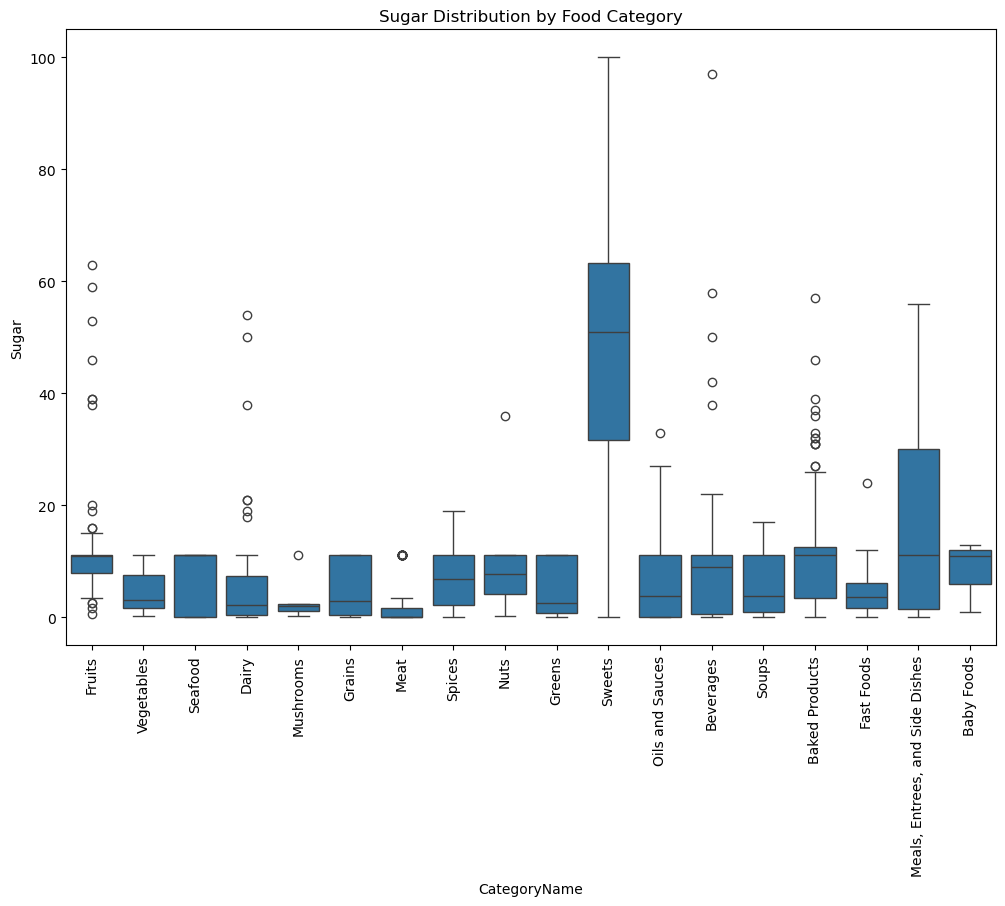

In [22]:
# Visualize the distribution of sugar across different categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='CategoryName', y='Sugar', data=df_new2)
plt.xticks(rotation=90)
plt.title('Sugar Distribution by Food Category')
plt.show()

'Sweets' food category has significantly high 'Sugar' content. So, this non-target feature will be helpful in classification of 'Sweets'.

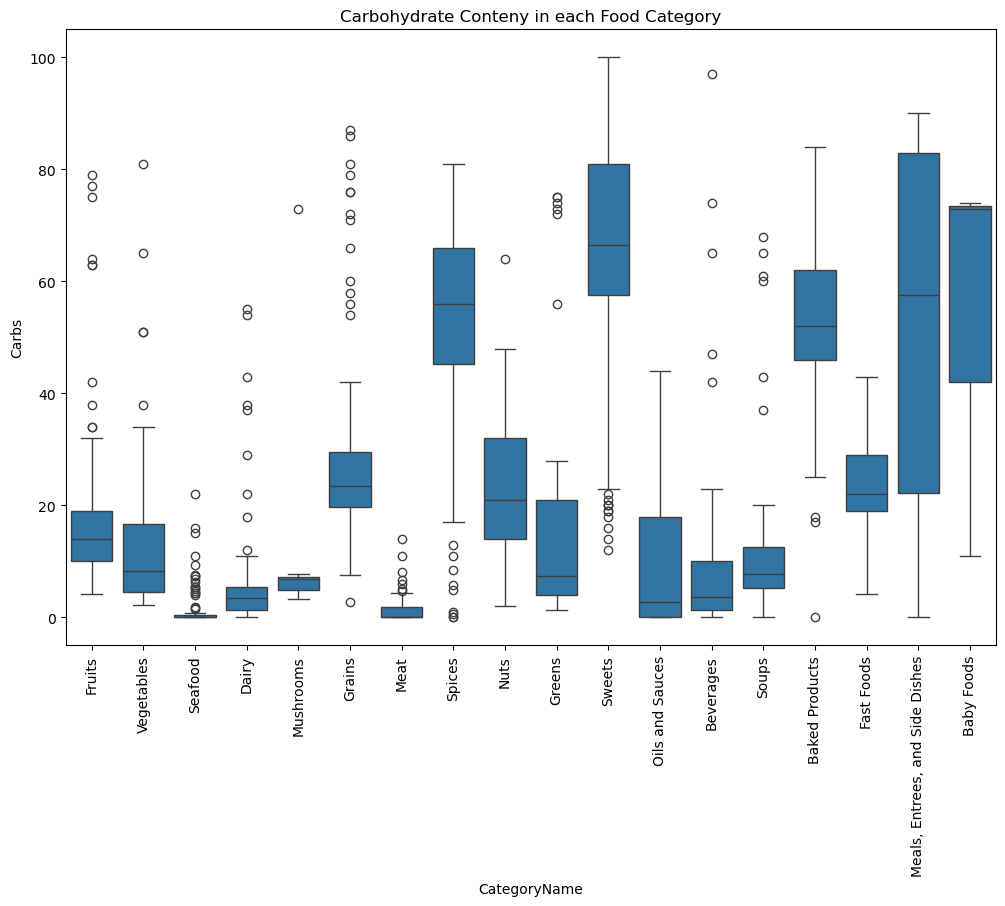

In [23]:
# Visualize the distribution of carbohydrates across different categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='CategoryName', y='Carbs', data=df_new2)
plt.xticks(rotation=90)
plt.title('Carbohydrate Conteny in each Food Category')
plt.show()

'Fruits', 'Vegetables', 'Mushrooms', 'Meat' etc. have very low 'Carbs' content, whereas 'Spices', 'Sweets', 'Baked Products' have high 'Carbs' content.

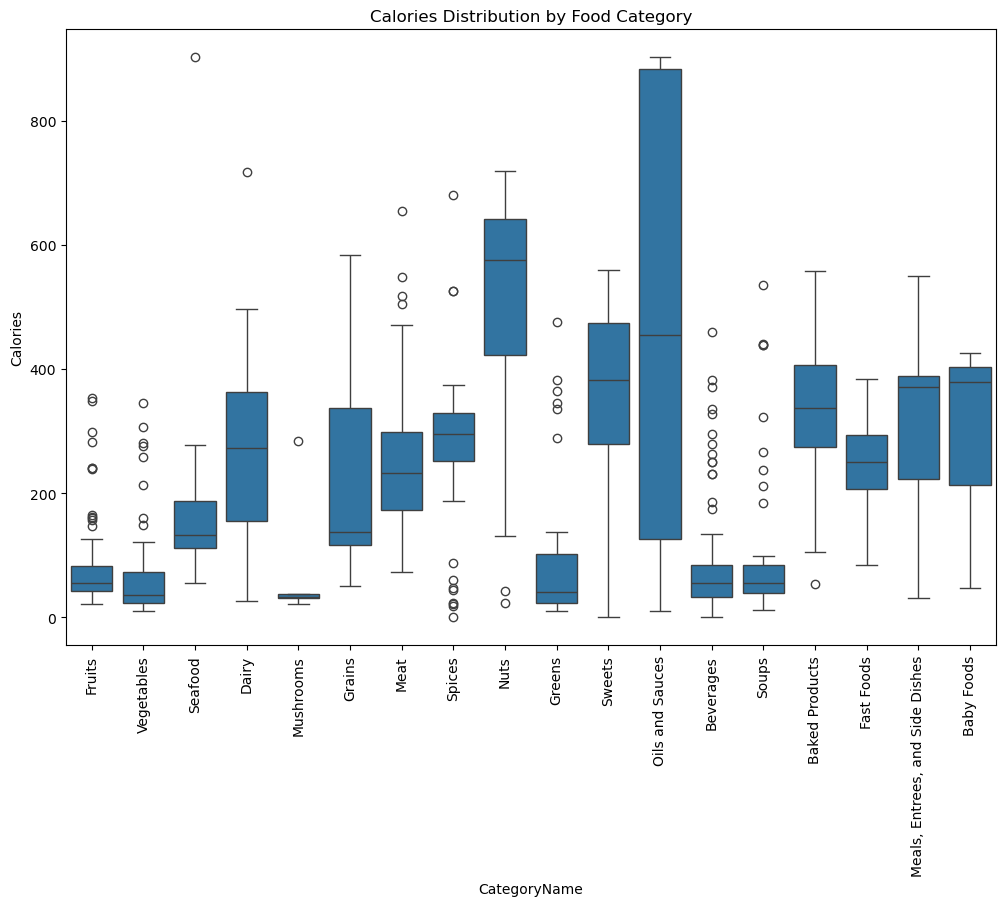

In [24]:
# Visualize the distribution of calories across different categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='CategoryName', y='Calories', data=df_new2)
plt.xticks(rotation=90)
plt.title('Calories Distribution by Food Category')
plt.show()

'Fruits', 'Vegetables', 'Mushrooms', 'Greens' have very low 'Calories', 'Nuts' has very high 'Calories'.

By observing these relations between target 'CategoryFood' and non-target features, this problem can be treated as a classification problem of identifying food categories.

## 2. Selection of non-target features

In [25]:
print(missing_columns.dtype)
missing_columns

int64


Calcium                                25
Cholesterol                            55
Copper                                 80
Fiber                                  98
Folate                                103
Iron                                   21
Magnesium                              61
MonounsaturatedFat                    110
Netcarbs                                1
Omega-3-DHA                           272
Omega-3-DPA                           279
Omega-3-EPA                           271
Phosphorus                             48
Polyunsaturatedfat                    110
Potassium                              45
SaturatedFat                           81
Selenium                              154
Sodium                                 21
TransFat                              540
VitaminA(IU)                           56
VitaminARAE                           118
VitaminB1                              59
VitaminB12                             91
VitaminB2                         

- We can see that all the missing columns are numeric. 

- Here, 'Omega-6-Gamma-linoleicacid', 'Omega-3-Eicosatrienoicacid', 'Omega-6-Dihomo-gamma-linoleicacid ', 'Omega-6-Linoleicacid ', 'Omega-6-Arachidonicacid' have a lot of missing values (more than 1000). Filling the missing values of these features may not help in classification. We can drop these features.

- We will also drop 'FoodName' features. As it will not help in classification.

In [26]:
# # Select a subset of columns
# df_new1 = df.drop(columns=['FoodName', 'Omega-6-Gamma-linoleicacid', 'Omega-3-Eicosatrienoicacid', 
#                           'Omega-6-Dihomo-gamma-linoleicacid', 'Omega-6-Linoleicacid', 
#                           'Omega-6-Arachidonicacid'])

print("New dataset rows and columns:", df_new1.shape)
df_new1.head()

New dataset rows and columns: (1174, 53)


,CategoryName,Calcium,Calories,Carbs,Cholesterol,Copper,Fats,Fiber,Folate,Iron,...,Starch,Sugar,Threonine,Tryptophan,Valine,VitaminD,VitaminE,VitaminK,Omega-3-ALA,Omega-6-Eicosadienoicacid
0,Fruits,0.012,32.0,7.7,0.0,0.00009,0.30,1.1,0.000014,0.00020,...,0.00,11.084233,0.000629,0.000337,0.000541,7.752714e-07,0.001692,0.000029,0.00,0.0
1,Fruits,0.006,52.0,14.0,0.0,0.00003,0.17,2.4,0.000003,0.00012,...,0.05,10.000000,0.000010,0.000000,0.000010,0.000000e+00,0.000180,0.000002,0.00,0.0
2,Fruits,0.013,48.0,11.0,0.0,0.00008,0.39,2.0,0.000009,0.00039,...,0.00,9.200000,0.000050,0.000020,0.000050,0.000000e+00,0.000890,0.000003,0.00,0.0
3,Fruits,0.055,241.0,63.0,0.0,0.00034,0.51,7.3,0.000010,0.00270,...,0.35,53.000000,0.000070,0.000020,0.000080,0.000000e+00,0.004300,0.000003,0.00,0.0
4,Fruits,0.012,160.0,8.5,0.0,0.00019,15.00,6.7,0.000081,0.00055,...,0.11,0.660000,0.000070,0.000030,0.000110,0.000000e+00,0.002100,0.000021,0.11,0.0


Then, we can see correlation matrix to observe which non-target features are strongly correlated with each other.

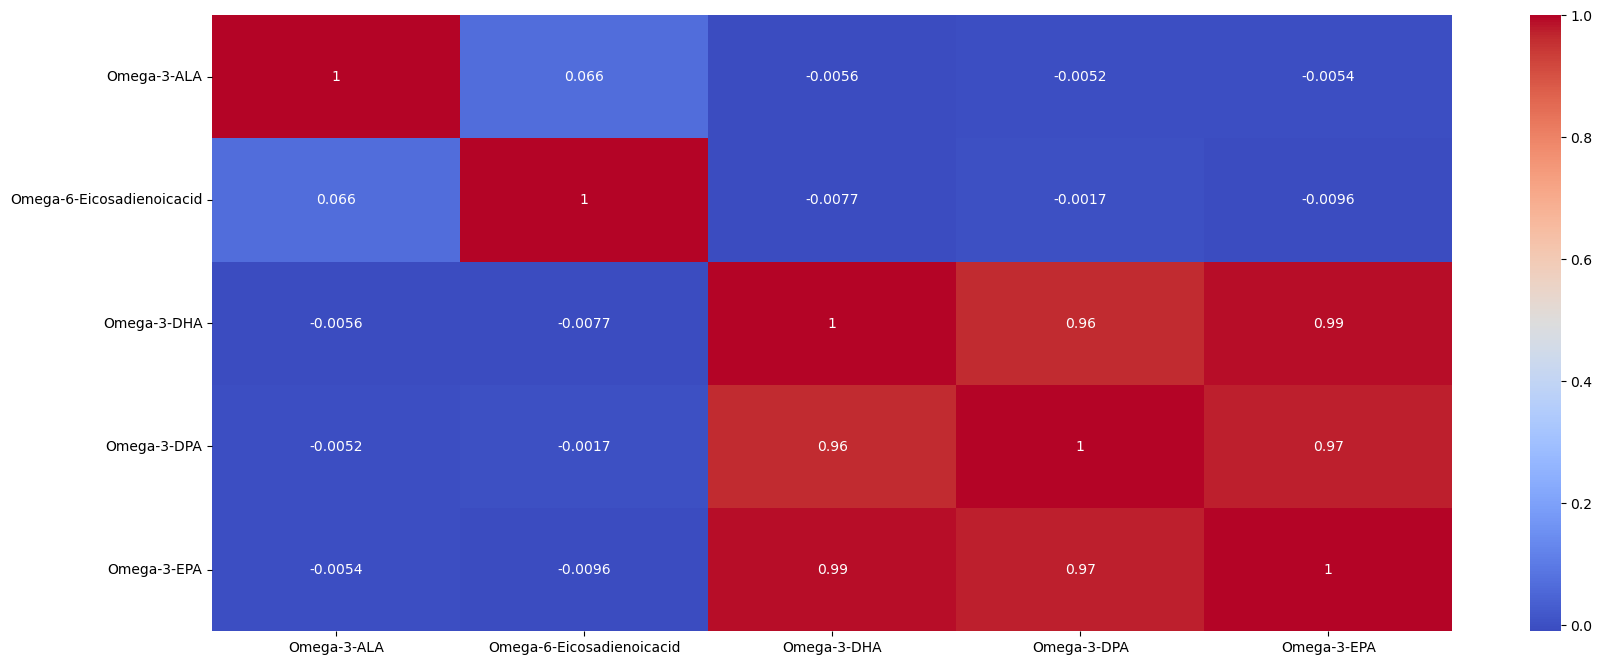

In [27]:
corr_matrix_omega = df_new1[['Omega-3-ALA', 'Omega-6-Eicosadienoicacid', 
                            'Omega-3-DHA', 'Omega-3-DPA','Omega-3-EPA']].corr()

# After dropping, 
# corr_matrix_omega = df_new1[['Omega-3-ALA', 'Omega-6-Eicosadienoicacid', 'Omega-3-DHA',
#                            ]].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20,8))
sns.heatmap(corr_matrix_omega, annot=True, cmap="coolwarm")
plt.show()

We can drop 'Omega-3-DPA', 'Omega-3-EPA'

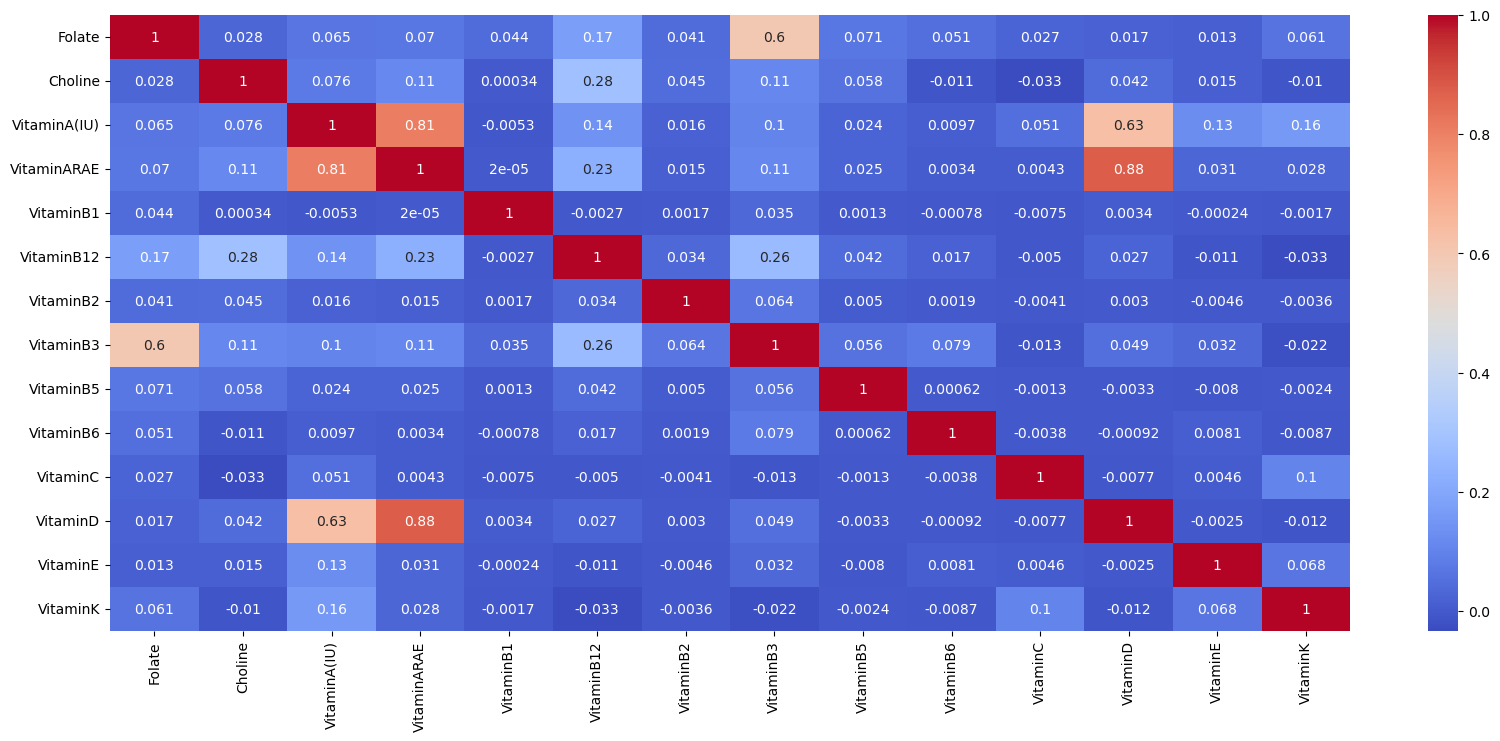

In [28]:
corr_matrix_vitamin = df_new1[['Folate', 'Choline', 'VitaminA(IU)', 'VitaminARAE', 'VitaminB1', 'VitaminB12', 'VitaminB2', 
                       'VitaminB3', 'VitaminB5', 'VitaminB6', 'VitaminC', 'VitaminD', 'VitaminE', 
                       'VitaminK']].corr()

# corr_matrix_vitamin = df_new[['Folate', 'Choline', 'VitaminA(IU)', 'VitaminB1', 'VitaminB12', 'VitaminB2', 
#                               'VitaminB5', 'VitaminB6', 'VitaminC', 'VitaminE', 'VitaminK']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20,8))
sns.heatmap(corr_matrix_vitamin, annot=True, cmap="coolwarm")
plt.show()

We can drop 'VitaminARAE' as it has very high correlation with 'VitaminD', and 'VitaminA(IU)'

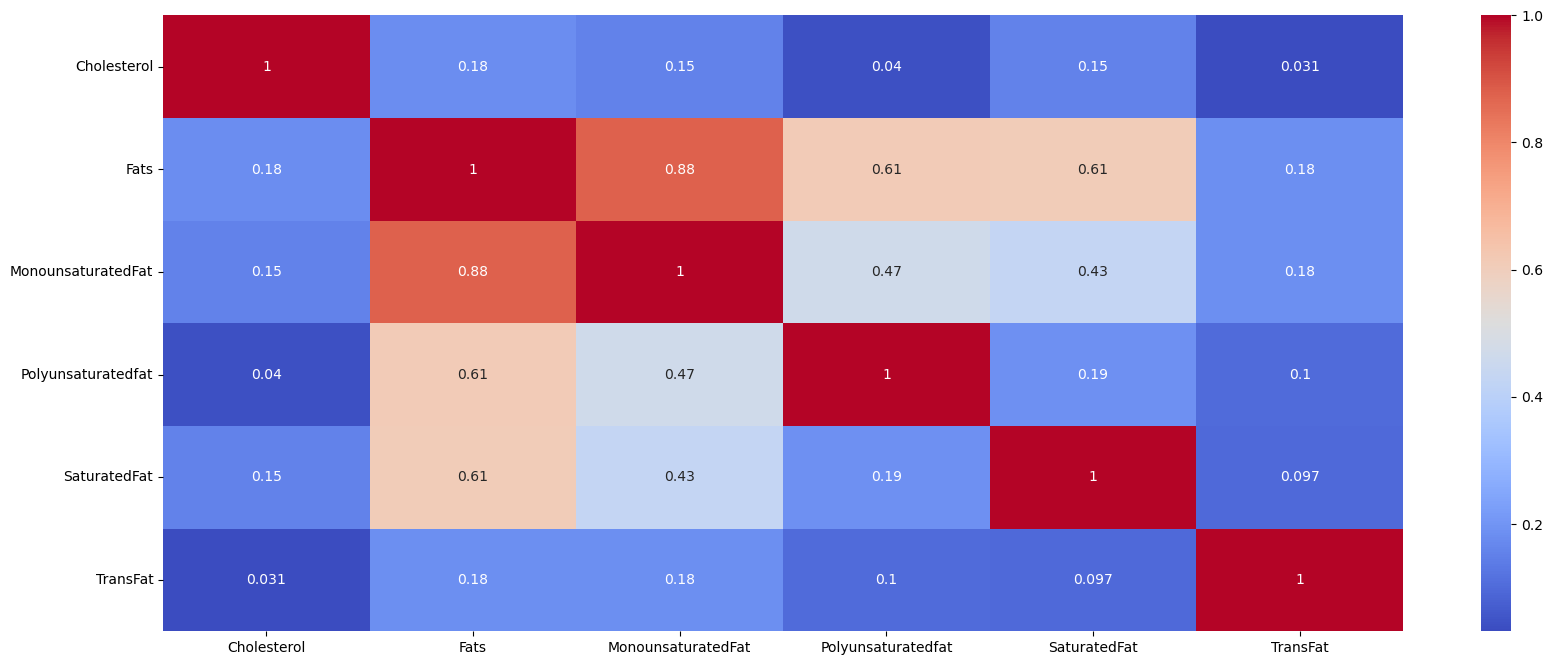

In [29]:
corr_matrix_fat = df_new1[['Cholesterol', 'Fats', 'MonounsaturatedFat', 'Polyunsaturatedfat',
                          'SaturatedFat', 'TransFat', 
                         ]].corr()

# corr_matrix_fat = df_new[['Cholesterol', 'Fats', 'TransFat']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20,8))
sns.heatmap(corr_matrix_fat, annot=True, cmap="coolwarm")
plt.show()

We can drop 'MonounsaturatedFat'

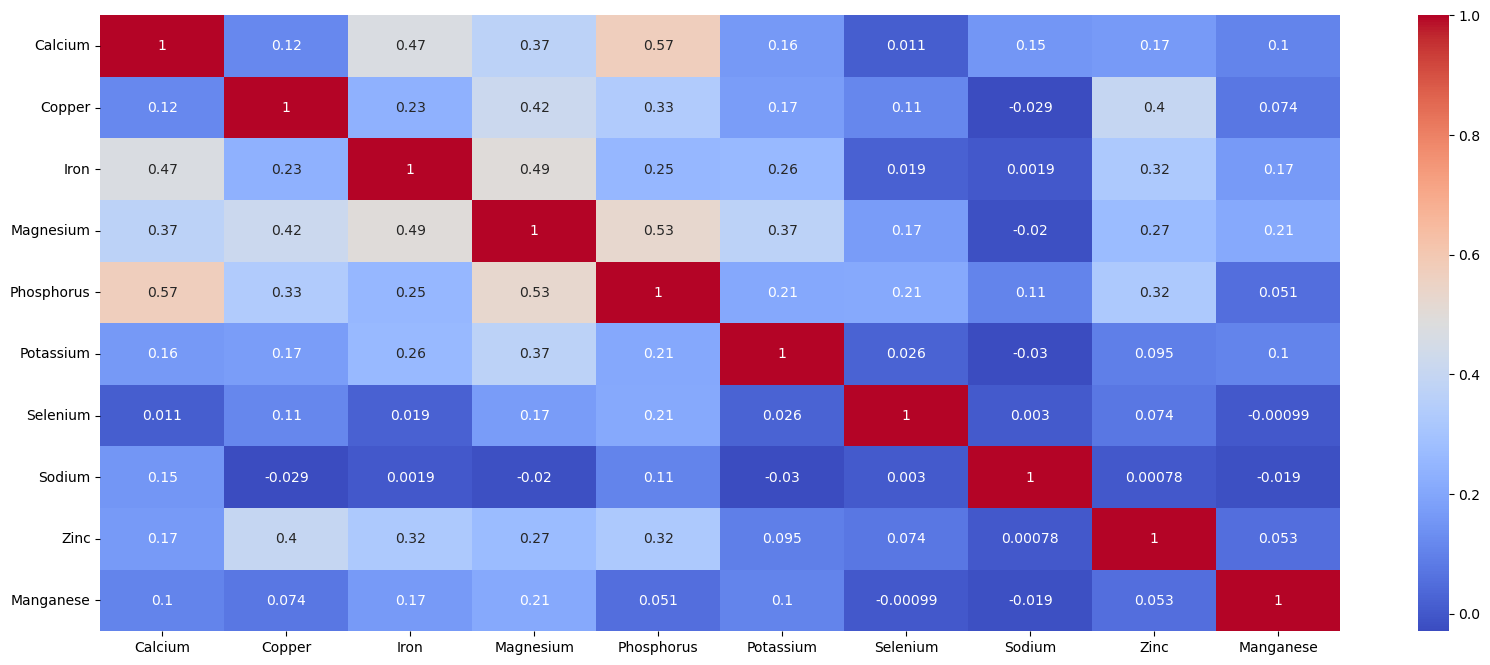

In [30]:
corr_matrix_mineral = df_new1[['Calcium', 'Copper', 'Iron', 'Magnesium', 'Phosphorus',
                              'Potassium', 'Selenium', 'Sodium', 'Zinc', 'Manganese', 
                              ]].corr()


# corr_matrix_mineral = df_new[['Calcium', 'Copper', 'Iron', 'Magnesium',
#                               'Potassium', 'Selenium', 'Sodium', 'Zinc', 'Manganese', 
#                               ]].corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20,8))
sns.heatmap(corr_matrix_mineral, annot=True, cmap="coolwarm")
plt.show()

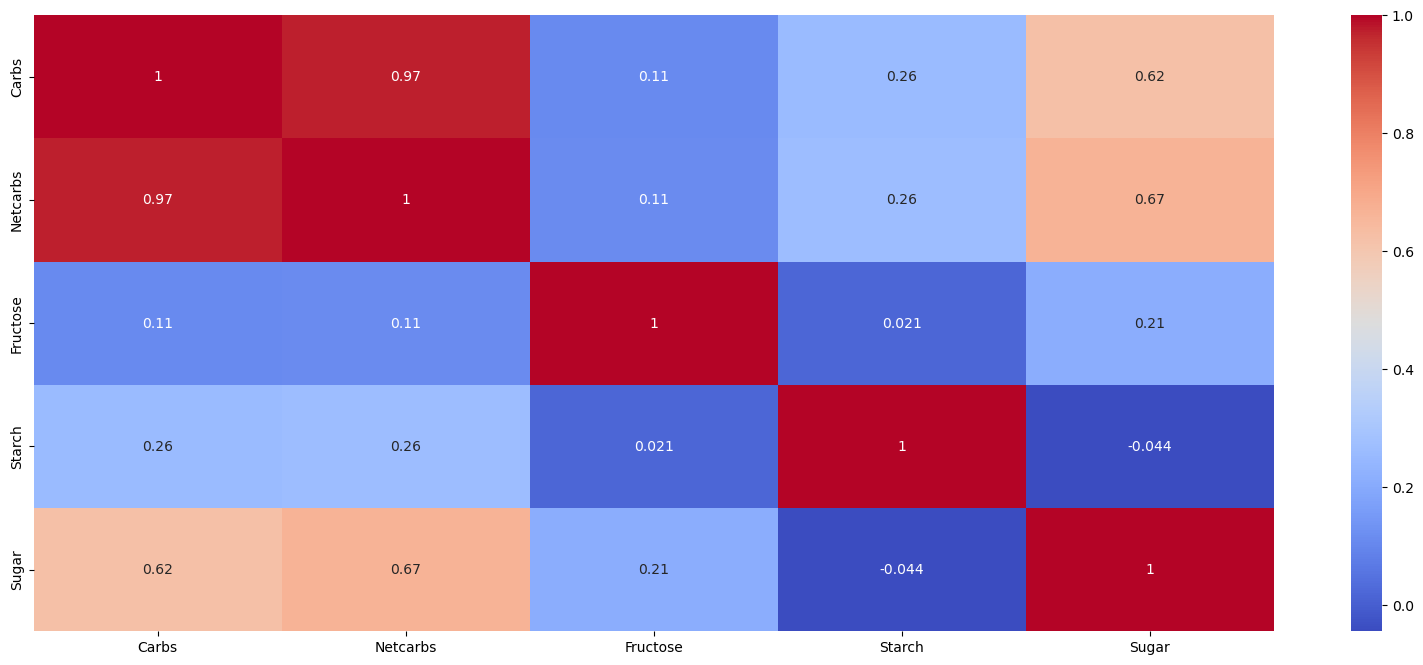

In [31]:
corr_matrix_carbs = df_new1[['Carbs', 'Netcarbs', 'Fructose', 'Starch', 'Sugar', 
                              ]].corr()

# corr_matrix_carbs = df_new[['Carbs', 'Fructose', 'Starch', 
#                               ]].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20,8))
sns.heatmap(corr_matrix_carbs, annot=True, cmap="coolwarm")
plt.show()

We can drop 'Netcarbs'

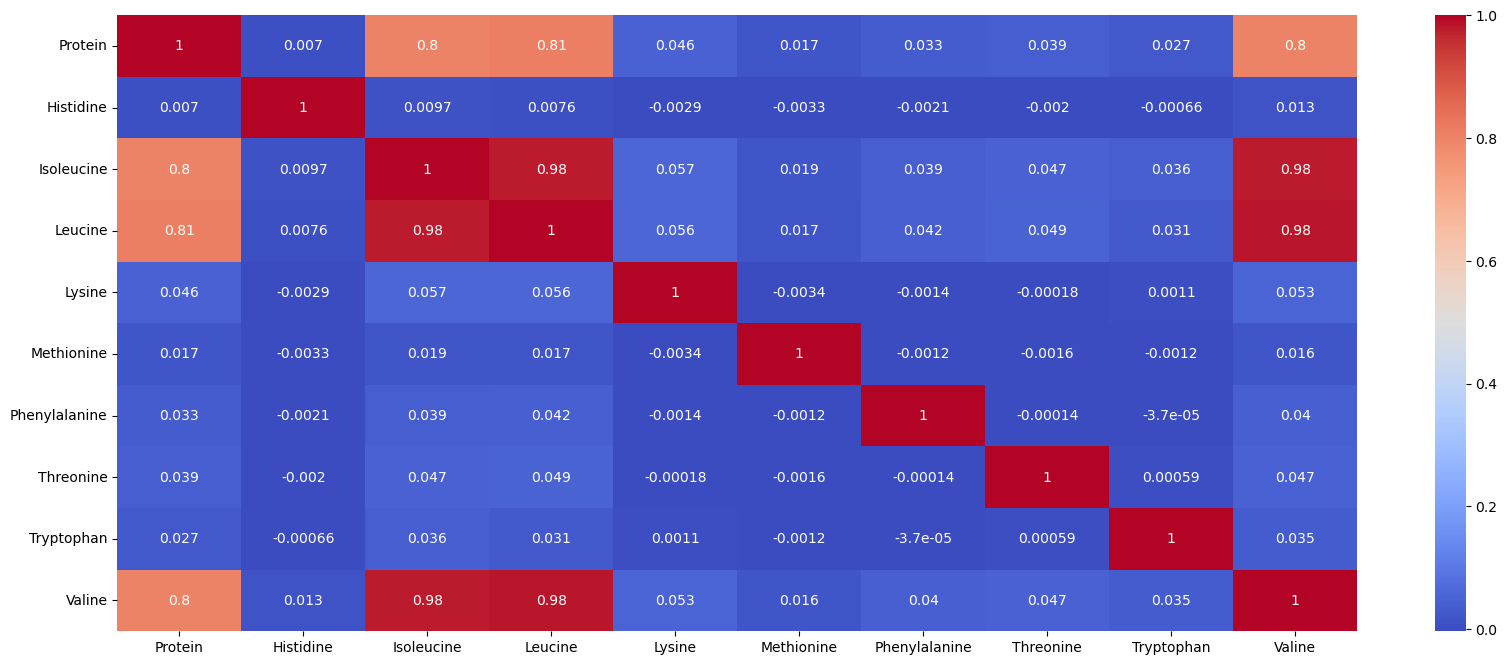

In [32]:
corr_matrix_protein = df_new1[['Protein', 'Histidine', 'Isoleucine', 'Leucine', 'Lysine',
                              'Methionine', 'Phenylalanine', 'Threonine',
                              'Tryptophan', 'Valine',
                              ]].corr()

# corr_matrix_protein = df_new[['Protein', 'Histidine', 'Lysine',
#                               'Methionine', 'Phenylalanine', 'Threonine',
#                               'Tryptophan', 
#                               ]].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20,8))
sns.heatmap(corr_matrix_protein, annot=True, cmap="coolwarm")
plt.show()

We can drop 'Valine', 'Leucine', 'Isoleucine'

- After observing correlation matrix to see which non-target features are strongly correlated with each other, we can drop 'Netcarbs', 'Valine', 'Leucine', 'Isoleucine', 'MonounsaturatedFat', 'VitaminARAE', 'Omega-3-DPA', 'Omega-3-EPA',

- Then, new dataset 'df_new2' was prepared from 'df_new1'

In [33]:
# df_new2 = df_new1.drop(columns=['Netcarbs', 'Valine', 'Leucine', 'Isoleucine',
#                               'MonounsaturatedFat', 'VitaminARAE', 'Omega-3-DPA', 'Omega-3-EPA',
#                          ])


print("Updated dataset rows and columns:", df_new2.shape)
df_new2.head()

Updated dataset rows and columns: (1174, 45)


,CategoryName,Calcium,Calories,Carbs,Cholesterol,Copper,Fats,Fiber,Folate,Iron,...,Phenylalanine,Starch,Sugar,Threonine,Tryptophan,VitaminD,VitaminE,VitaminK,Omega-3-ALA,Omega-6-Eicosadienoicacid
0,Fruits,0.012,32.0,7.7,0.0,0.00009,0.30,1.1,0.000014,0.00020,...,0.000681,0.00,11.084233,0.000629,0.000337,7.752714e-07,0.001692,0.000029,0.00,0.0
1,Fruits,0.006,52.0,14.0,0.0,0.00003,0.17,2.4,0.000003,0.00012,...,0.000010,0.05,10.000000,0.000010,0.000000,0.000000e+00,0.000180,0.000002,0.00,0.0
2,Fruits,0.013,48.0,11.0,0.0,0.00008,0.39,2.0,0.000009,0.00039,...,0.000050,0.00,9.200000,0.000050,0.000020,0.000000e+00,0.000890,0.000003,0.00,0.0
3,Fruits,0.055,241.0,63.0,0.0,0.00034,0.51,7.3,0.000010,0.00270,...,0.000060,0.35,53.000000,0.000070,0.000020,0.000000e+00,0.004300,0.000003,0.00,0.0
4,Fruits,0.012,160.0,8.5,0.0,0.00019,15.00,6.7,0.000081,0.00055,...,0.000100,0.11,0.660000,0.000070,0.000030,0.000000e+00,0.002100,0.000021,0.11,0.0


## 3. Appropiate metric for evaluating the model

In [34]:
df['CategoryName'].value_counts()

CategoryName
Baked Products                     106
Meat                               100
Sweets                              96
Meals, Entrees, and Side Dishes     90
Vegetables                          90
Fruits                              89
Beverages                           84
Seafood                             83
Grains                              68
Soups                               67
Greens                              60
Dairy                               58
Oils and Sauces                     54
Spices                              46
Fast Foods                          45
Nuts                                27
Mushrooms                            8
Baby Foods                           3
Name: count, dtype: int64

- We can see that the dataset is highly imbalanced, where 'Mushrooms' appear only 8 times, 'Baby Foods' 3 times, whereas 'Baked Products' 106 times. So accuracy would not be a suitable metric for model evaluation in this dataset as it can be misleading by favoring majority food categories.
  
- We should evaluate the estimators based on F1 score, as it is a harmonic mean of precision and recall (a balance between precision and recall).  

- Macro F1 and Weighted F1 versions of F1 score account for class imbalance. We choose weighted F1 as it takes the number of instances of each class into account when averaging F1 scores. Each class's F1 score is weighted by the number of instances in that class.

- We are not choosing macro F1 because it may penalize models even if they perform well on the majority classes (and do not perform good on minority classes).

## 4. Evaluating the model

In [35]:
# f1_weighted = f1_score(y_test_encoded, y_pred, average='weighted')
print("Weighted F1 Score on test set:", f1_weighted)

Weighted F1 Score on test set: 0.7989795947456614


- We can see classification report to see F1 score on each food category

In [36]:
# Evaluate the performance
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred, zero_division=1))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.86      0.86      0.86        29
           2       0.77      0.92      0.84        26
           3       0.79      0.85      0.81        13
           4       0.67      0.71      0.69        14
           5       0.85      0.92      0.88        24
           6       0.55      0.80      0.65        20
           7       0.72      0.68      0.70        19
           8       0.80      0.61      0.69        33
           9       0.90      0.93      0.92        29
          10       1.00      1.00      1.00         2
          11       0.67      0.50      0.57         4
          12       0.92      0.57      0.71        21
          13       0.96      0.93      0.95        29
          14       0.71      0.91      0.80        22
          15       0.71      0.71      0.71        14
          16       0.92      0.83      0.87        29
    

- Here, we used 'zero_division=1' command inside classification report because true positive and false positive both are 0 for 'Baby Food' Category. So we end up with 0/0 as precision value for that category.

In [37]:
# Print the mapping of categories to encoded values
print("Category to encoded value mapping:")
print(category_mapping)

Category to encoded value mapping:
{'Baby Foods': 0, 'Baked Products': 1, 'Beverages': 2, 'Dairy': 3, 'Fast Foods': 4, 'Fruits': 5, 'Grains': 6, 'Greens': 7, 'Meals, Entrees, and Side Dishes': 8, 'Meat': 9, 'Mushrooms': 10, 'Nuts': 11, 'Oils and Sauces': 12, 'Seafood': 13, 'Soups': 14, 'Spices': 15, 'Sweets': 16, 'Vegetables': 17}


- From the classification report, F1 score is quite low for 'Fast Foods' (0.69), 'Greens' (0.7), 'Grains' (0.65), and 'Meals, Entrees, and Side Dishes' (0.69). The reason may be they have some features overlapping with other classes (as seen in the confusion matrix).

- We can also observe confusion matrix for better understanding.

In [38]:
# Create a reverse mapping from encoded labels to food category names
reverse_category_mapping = {v: k for k, v in category_mapping.items()}


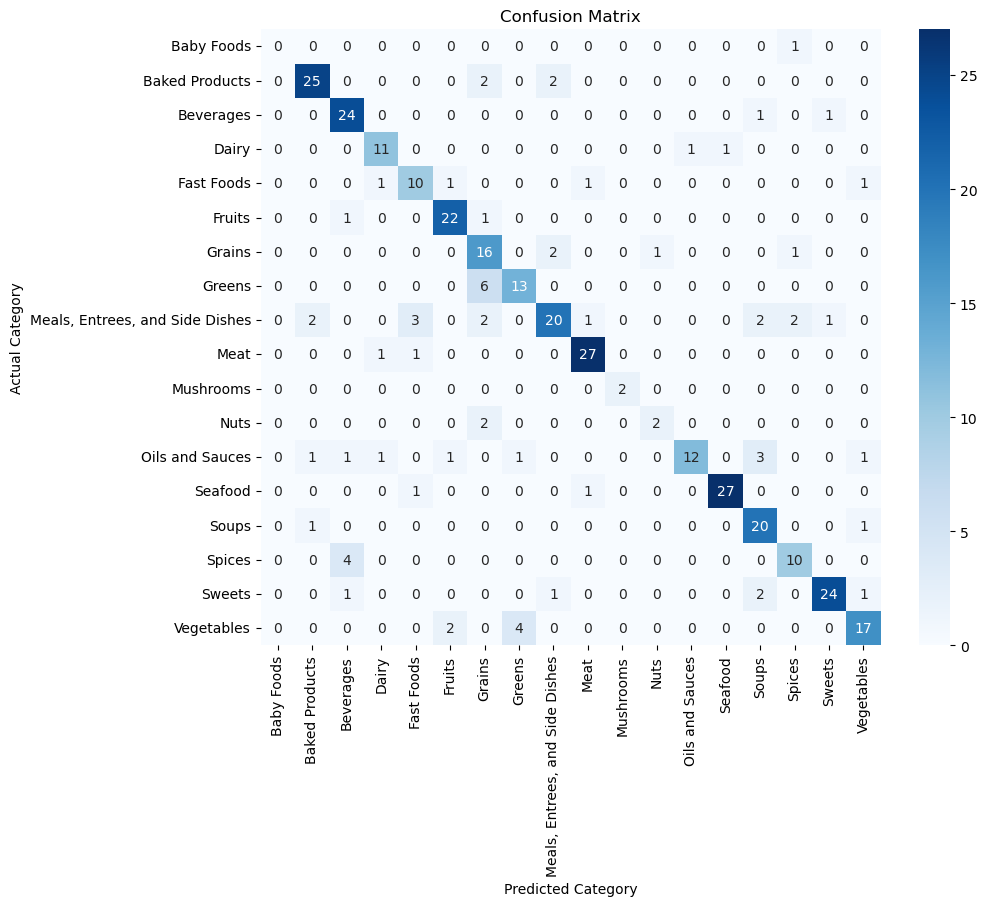

In [39]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=reverse_category_mapping.values(), 
            yticklabels=reverse_category_mapping.values())
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.title('Confusion Matrix')
plt.show()

- From the confusion matrix, we can see that the only instance of 'Baby Food' of test set was predicted incorrectly. This happened because instances of 'Baby Food' on training set was very low (only 2) compared to other classes.  


- The dataset is highly imbalanced. We can see a trend that classes with most instances, e.g., 'Baked Products', 'Meat', 'Sweets', etc. had quite high F1 scores. 

- On the other hand, classes with low instances, e.g., 'Fast Foods', 'Grains', 'Greens', 'Nuts', etc. had relatively low F1 scores. 

- The class with the lowest instances, 'Baby Foods' had 0 precision value.

- Categories like 'Mushrooms' may have more better class separation in feature space, allowing the model to learn distinguishing them effectively.

## Comments:

- To handle imbalance, oversampling of low instance classes can be performed. Techniques like oversampling of minority classes, e.g., SMOTE (Synthetic Minority Over-Sampling Technique) or undersampling of majority classes can help balance classes. However, undersampling of majority classes can degrade model's performance, because it can lead to the model losing valuable information. 